## Data606 - Capstone Project
```
Group H
Malav Patel, Kent Butler
Prof. Unal Sokaglu
```

The project is about climate data analysis and performing time-series analysis.

# Research

### References

Some explanations of earth sciences statistics:
https://pjbartlein.github.io/REarthSysSci/ltms-and-anomalies.html

NOAA PSL NCEP-NCAR datasets:  https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html

NOAA PSL, other recognized data sources directory: https://psl.noaa.gov/data/help/othersources/

Global environmental policy timeline, https://www.boell.de/en/2022/05/28/international-environmental-policy-timeline

OECD convergence of policy, climate,and economy: https://www.oecd.org/

NASA climate time machine: https://climate.nasa.gov/interactives/climate-time-machine

### Factoids

* All of the plastic waste produced in the world in 2019 alone weighs as much as 35,000 Eiffel Towers – 353 million tons  - [*Organization for Economic Cooperation and Development (OECD)*](https://www.boell.de/en/2022/05/28/international-environmental-policy-timeline)



## Application Parameters

Note: algorithm tuning is done with declaration of the model.

In [250]:
import pandas as pd
import datetime
from datetime import date

In [251]:
debug = True

DRIVE_PATH = "/content/drive/MyDrive/data606"

# Set the location of this script in GDrive
SCRIPT_PATH = DRIVE_PATH + "/src/"

# Root Path of the data on the cloud drive
DATA_PATH = DRIVE_PATH + "/data/"

# Number of samples to work with - will be split  into train/test
SAMPLE_SIZE = 5000

# Ratio of test data to train data - used for split
TEST_RATIO = 0.3

# Device to run on
run_on_device =  'cpu' # 'cuda'

# Start including data from this date
START_DATE =  pd.to_datetime(date.fromisoformat('1950-01-01'))
# Stop including data after this date
END_DATE = pd.to_datetime(date.fromisoformat('2022-12-31'))


In [252]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [253]:
%cd $SCRIPT_PATH

/content/drive/MyDrive/data606/src


In [254]:
# Load util class
%run -i "./ProjectUtil.ipynb"

# Data Load

In [255]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)
import warnings

In [256]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

---

**Initial Data Load**

---

*NOTE:  Is there a way to build a re-usable data load and normalization routine? For at least the simple datasets? And would that be helpful.*

### Global Temperature Data


This is a set of global long-term average monthly temperatures in Celsius.

Derived from multiple sets of data from:

`Global Historical Climatology Network (GHCN2), Peterson and Vose, 1997); the Atmospheric Environment Service/Environment Canada; the State Hydrometeorological Institute, St. Petersburg, Russia; Greenland—from the GC-Net (Steffen et al., 1996); the Automatic Weather Station Project (courtesy of Charles R. Stearns at the University of Wisconsin-Madison); the Global Synoptic Climatology Network (Dataset 9290c, courtesy of National Climatic Data Center); and the Global Surface Summary of Day (GSOD) (NCDC)`.

Monthly averages of station air temperature (T) were interpolated to a 0.5 degree by 0.5 degree latitude/longitude grid, where the grid nodes are centered on the 0.25 degree.

In [257]:
df = pd.read_csv(DATA_PATH + 'GlobalTemperatures.csv')

In [258]:
df.shape

(3192, 9)

In [259]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LandAverageTemperature,3180.0,8.374731,4.381310,-2.080,4.31200,8.6105,12.54825,19.021
LandAverageTemperatureUncertainty,3180.0,0.938468,1.096440,0.034,0.18675,0.3920,1.41925,7.880
LandMaxTemperature,1992.0,14.350601,4.309579,5.900,10.21200,14.7600,18.45150,21.320
LandMaxTemperatureUncertainty,1992.0,0.479782,0.583203,0.044,0.14200,0.2520,0.53900,4.373
LandMinTemperature,1992.0,2.743595,4.155835,-5.407,-1.33450,2.9495,6.77875,9.715
LandMinTemperatureUncertainty,1992.0,0.431849,0.445838,0.045,0.15500,0.2790,0.45825,3.498
LandAndOceanAverageTemperature,1992.0,15.212566,1.274093,12.475,14.04700,15.2510,16.39625,17.611
LandAndOceanAverageTemperatureUncertainty,1992.0,0.128532,0.073587,0.042,0.06300,0.1220,0.15100,0.457


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [261]:
df.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df.tail(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


**Condition dataset**

In [263]:
# convert to a Timestamp
df['date'] = pd.to_datetime(df['dt'])

In [264]:
# Truncate by our global date bounds
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]

In [265]:
# Drop uncertainties until we know what to do with them
DROP_LIST = ['LandAverageTemperatureUncertainty','LandMaxTemperatureUncertainty','LandMinTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty']

In [266]:
df.drop(DROP_LIST, axis=1, inplace=True)

In [267]:
df.reset_index(inplace=True)

In [268]:
df.tail(3)

,index,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,date
789,3189,2015-10-01,10.801,16.450,5.232,16.290,2015-10-01
790,3190,2015-11-01,7.433,12.892,2.157,15.252,2015-11-01
791,3191,2015-12-01,5.518,10.725,0.287,14.774,2015-12-01


In [269]:
# Sort values by timestamp (not necessary in this case)
df = df.sort_values(by='date')

In [270]:
from scipy.stats import kendalltau

# Create an array of time periods
time_periods = range(1, len(df['LandAverageTemperature']) + 1)

# Calculate Kendall's tau and p-value for the temperature data
tau, p_value = kendalltau(time_periods, df['LandAverageTemperature'])

# Define a significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print(f"The Kendall's tau statistic is {tau:.4f}, and the trend is statistically significant at {alpha} level.")
    print("There is evidence of a trend in the data.")
else:
    print(f"The Kendall's tau statistic is {tau:.4f}, and the trend is not statistically significant at {alpha} level.")
    print("There is no strong evidence of a trend in the data.")

The Kendall's tau statistic is 0.0834, and the trend is statistically significant at 0.05 level.
There is evidence of a trend in the data.


**Confirm time intervals**

In [271]:
# Check time intervals
df['interval'] = df.date - df.date.shift(1)

df[['date', 'interval']].head()

,date,interval
0,1950-01-01,NaT
1,1950-02-01,31 days
2,1950-03-01,28 days
3,1950-04-01,31 days
4,1950-05-01,30 days


In [272]:
print(f"{df['interval'].value_counts()}")

31 days    461
30 days    264
28 days     50
29 days     16
Name: interval, dtype: int64


In [273]:
df.drop(['interval'], axis=1, inplace=True)

---

**Visualize**

---

In [274]:
COLS = ['LandAverageTemperature',	'LandMaxTemperature',	'LandMinTemperature',	'LandAndOceanAverageTemperature']

**Individual data points**

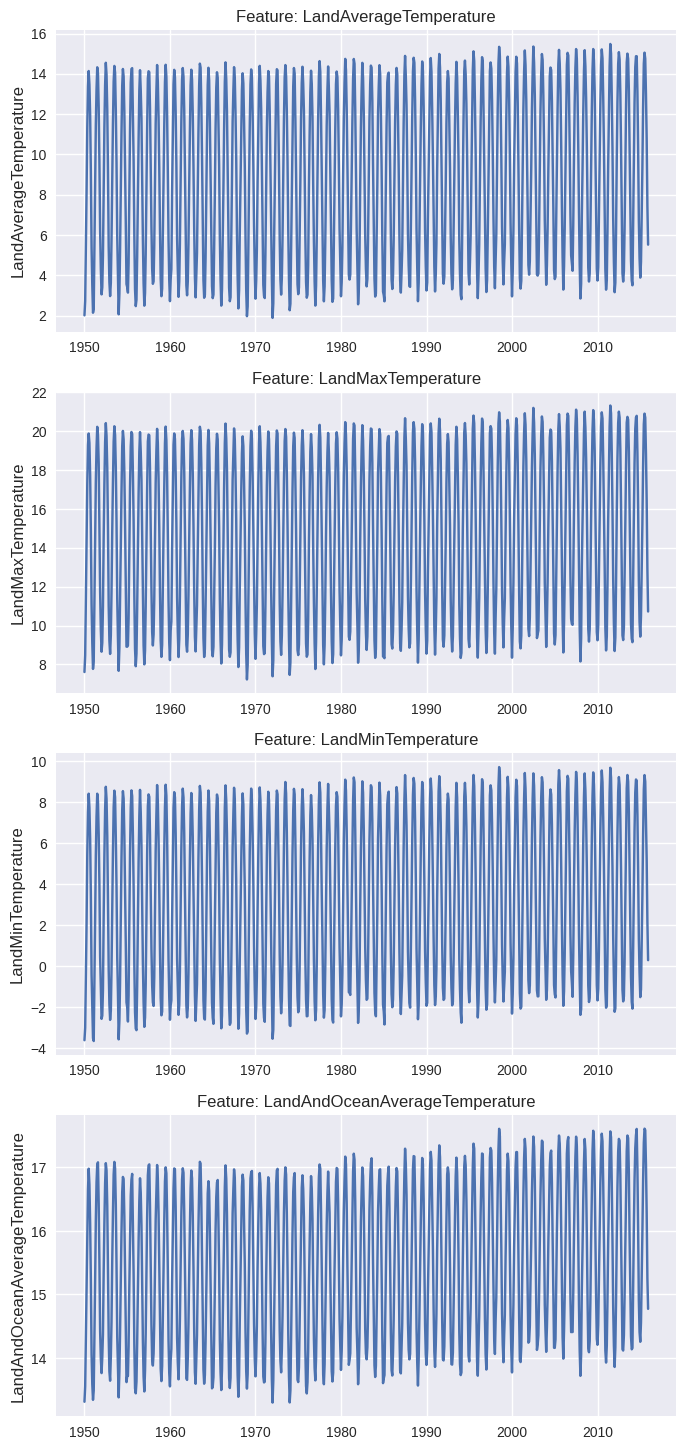

In [275]:
f, ax = plt.subplots(nrows=len(COLS), ncols=1, figsize=(8, 18))

for i, col in enumerate(COLS):
  sns.lineplot(x=df.date, y=df[col].fillna(np.inf), ax=ax[i])
  ax[i].set_title(f'Feature: {col}', fontsize=12)
  ax[i].set_ylabel(ylabel=f'{col}', fontsize=12)
  ax[i].set_xlabel('')

We can see an overall trend moving upward. No visible data dropouts.

**Missing Data**

In [276]:
df.isna().value_counts()

index  dt     LandAverageTemperature  LandMaxTemperature  LandMinTemperature  LandAndOceanAverageTemperature  date 
False  False  False                   False               False               False                           False    792
dtype: int64

Set has no missing data.

**Resampling**

Time intervals are already at monthly target.

In [277]:
df.shape

(792, 7)

Ready for time series modeling.

---

**Prepare for Modeling**

---

**Basic model params**

In [278]:
TARGET_LABEL = 'LandAndOceanAverageTemperature'
WINDOW_SIZE = 60
VALIDATION_PCT = 0  # 0..1 percent of data to use as validation

**Extract single datapoint**

In [279]:
input = pd.DataFrame(list(df[TARGET_LABEL]), index = df['date'], columns=['temp'])

**For multivariate, move date into index and retain fields**

In [280]:
df.set_index('date', inplace=True)

In [281]:
df.drop(['index','dt'],axis=1,inplace=True)

In [282]:
df.head(2)

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
date,,,,
1950-01-01,2.008,7.611,-3.622,13.311
1950-02-01,2.721,8.475,-3.013,13.554


---

**Data pre-processing**

---

**Extract X and y**

In [283]:
# Extract y
y = df[TARGET_LABEL].values
#... and drop so we can isolate X values
df.drop(columns=[TARGET_LABEL], inplace=True)

In [284]:
# Extract X
X = df.values

**Dataset stats**

In [285]:
NUM_FEATURES = len(X[0])

In [286]:
# Keep rows aside for post validation?
TOTAL_ROWS = len(X)
NUM_VALIDATION = math.floor(TOTAL_ROWS * VALIDATION_PCT)
WORKING_ROWS = TOTAL_ROWS - NUM_VALIDATION

In [287]:
# Split non-validation rows into train/test
NUM_TEST = math.floor(WORKING_ROWS * TEST_RATIO)
NUM_TRAIN = WORKING_ROWS - NUM_TEST

In [288]:
print(f'Num features: {NUM_FEATURES}')
print(f'Total rows: {TOTAL_ROWS}')
print(f'Validation rows: {NUM_VALIDATION}')
print(f'Train rows: {NUM_TRAIN}')
print(f'Test rows: {NUM_TEST}')

Num features: 3
Total rows: 792
Validation rows: 0
Train rows: 555
Test rows: 237


**Convert X/y for modeling**

In [289]:
# To np arrays
X = np.array(X[:WORKING_ROWS])
y = np.array(y[:WORKING_ROWS])

**Scale data**

In [293]:
from sklearn.preprocessing import StandardScaler

In [294]:
sclr = StandardScaler()
# Scale X; convert to float128 to avoid np.exp() overflows
X_t = sclr.fit_transform(X).astype(np.float128)

In [296]:
# need Nx1 matrices per feature sample set
if len(X_t.shape) > 1:
  X_t = X_t.reshape(X_t.shape[0],-1, 1)

In [299]:
# Extracted, scaled features
X_t.shape, y.shape

((792, 3, 1), (792,))

**Slice into Windows**

Want data in a shape compatible with windowed network input, i.e.:

`input dimensions: n_samples x time x variables`



In [303]:
X_win = []
y_win = []

In [301]:
X_t[0,:]

array([[-1.67483888],
       [-1.65980776],
       [-1.71320301]], dtype=float128)

In [304]:
# Move window through training data - each block of input X has a single supervised target y
for i in range(WORKING_ROWS - WINDOW_SIZE):
    X_win.append(X_t[i:i+WINDOW_SIZE,:])
    y_win.append(y[i+WINDOW_SIZE])

In [305]:
X_win = np.asarray(X_win)
y_win = np.asarray(y_win)

In [306]:
X_win.shape, y_win.shape

((732, 60, 3, 1), (732,))

**Split into Train/Test**

In [307]:
X_train = X_win[:NUM_TRAIN,:]
X_test = X_win[NUM_TRAIN:,:]
y_train = y_win[:NUM_TRAIN]
y_test = y_win[NUM_TRAIN:]

if debug:
  print(f'X_train, y_train: {X_train.shape}, {y_train.shape}')

X_train, y_train: (555, 60, 3, 1), (555,)


In [310]:
# Scale y_train
y_train = sclr.fit_transform(y_train.reshape(-1, 1))

**Prep GPU**

In [313]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


**Build model**

In [189]:
# Load model class
#%run -i "./Model_LSTM_v2.ipynb"

In [190]:
# Use default balanced scale from -1..1 for better network training
#model = ModelLSTMv2(df, test_ratio=TEST_RATIO, num_epochs=1, debug=debug)

In [335]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers import Dense,RepeatVector, LSTM, Dropout
from keras.layers import Flatten, Conv1D, MaxPooling1D
from keras.layers import Bidirectional, Dropout
from keras.models import Sequential
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [320]:
early_stop = EarlyStopping(monitor = "mse", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(WINDOW_SIZE, NUM_FEATURES)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(WINDOW_SIZE))
model.add(LSTM(units=100, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='tanh'))
model.add(LSTM(units=100, return_sequences=True, activation='tanh'))
model.add(Bidirectional(LSTM(128, activation='tanh')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [321]:
#model_hist = model.fit(X_train, y_train, epochs=300, verbose=1, callbacks = [early_stop] )
model_hist = model.fit(X_train, y_train, epochs=300, verbose=1 )

Epoch 1/300
18/18 [==============================] - 14s 30ms/step - loss: 0.2511
Epoch 2/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0387
Epoch 3/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0338
Epoch 4/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0296
Epoch 5/300
18/18 [==============================] - 0s 23ms/step - loss: 0.0256
Epoch 6/300
18/18 [==============================] - 0s 25ms/step - loss: 0.0398
Epoch 7/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0368
Epoch 8/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0414
Epoch 9/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0270
Epoch 10/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0260
Epoch 11/300
18/18 [==============================] - 0s 24ms/step - loss: 0.0275
Epoch 12/300
18/18 [==============================] - 0s 23ms/step - loss: 0.0282
Epoch 13/300
18/18 [====

In [322]:
# Predictions
pred = model.predict(X_test)

6/6 [==============================] - 2s 15ms/step


In [323]:
# Unscale predictions for comparison to y_test
pred = sclr.inverse_transform(pred)

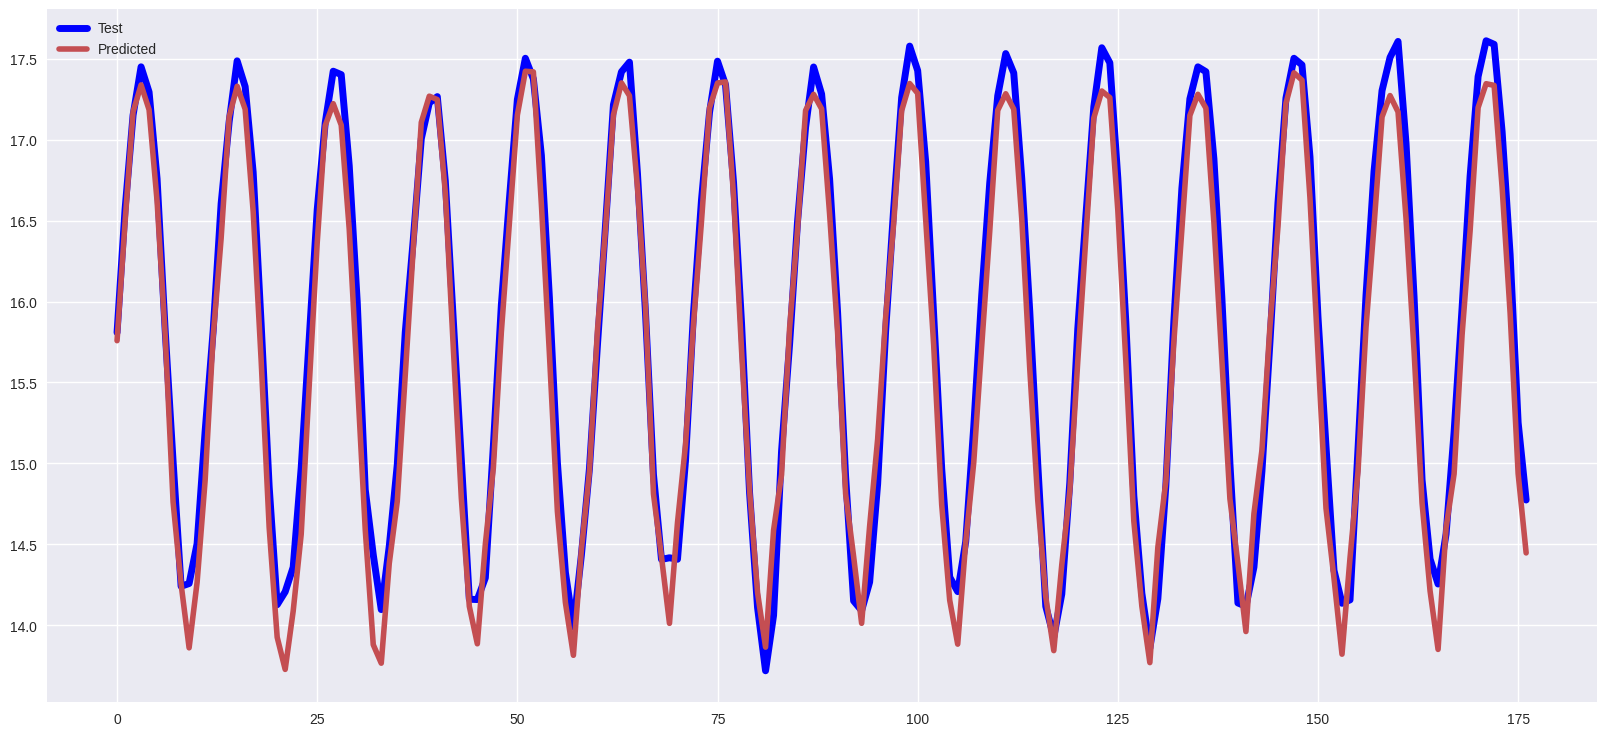

In [324]:
plt.figure(figsize=(20,9))
plt.plot(y_test , 'blue', linewidth=5)
plt.plot(pred,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
# Calculate MAPE
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.update_state(y_test, pred)

In [337]:
print(f'MSE: {mean_squared_error(y_test, pred)}')
print(f'MAE: {mean_absolute_error(y_test, pred)}')
print(f'MAPE: {m.result().numpy()}')

MSE: 0.049566585618992534
MAE: 0.18762504327633972
MAPE: 1.1980929374694824


---

## Pick back up here once everything works

---

In [198]:
#model.prep()

**Train model**

In [199]:
#model.train()

In [200]:
# Save model
#model.save_model(SCRIPT_PATH)

**Run prediction**

In [201]:
#model.predict()